In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df1=pd.read_csv('ttrain.csv')

In [3]:
df2=pd.read_csv('ttest.csv')

In [4]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [5]:
df=pd.concat([df1,df2],ignore_index=True) #df1 ve df2 yi birleştirir.

## EDA - Exploratory Data Analysis

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
df.Name.value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [10]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Col','Major','Dr','Capt'],'Mr')

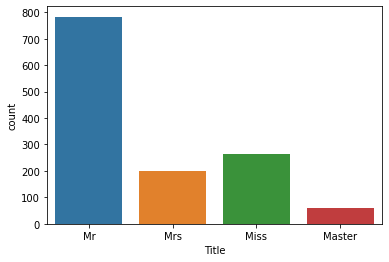

In [11]:
df.Title.value_counts()
sns.countplot(df.Title)

In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [13]:
df.Age.fillna(df.groupby("Title")["Age"].transform("median"),inplace=True) #Age deki boşlukları ortalama değer ile doldurur.

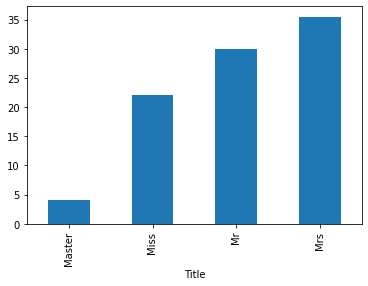

In [14]:
df.groupby("Title")["Age"].median().plot.bar()

In [15]:
del df["Cabin"]

In [16]:
df["Fare"].fillna(df["Fare"].median(),inplace=True)

In [17]:
df["Family"]=df["SibSp"]+df["Parch"]+1

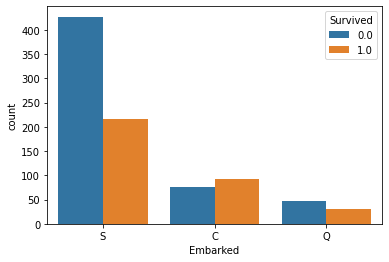

In [18]:
sns.countplot(df["Embarked"],hue=df["Survived"])

In [19]:
df['Embarked']=df['Embarked'].fillna('S')

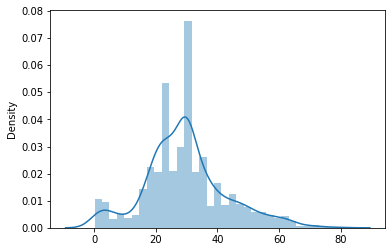

In [20]:
sns.distplot(x=df.Age)

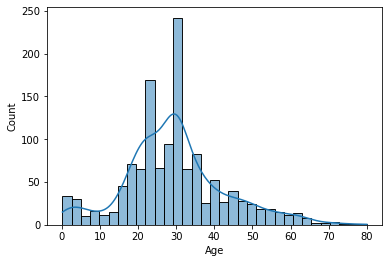

In [21]:
sns.histplot(df["Age"],kde=True)

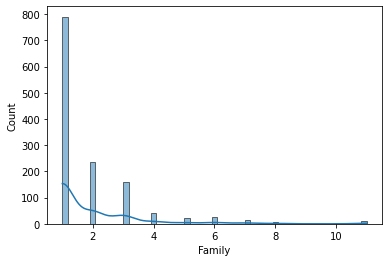

In [22]:
sns.histplot(df["Family"],kde=True)

In [23]:
df.drop(['Ticket','Name'],axis=1,inplace=True)

In [24]:
df=pd.get_dummies(df,drop_first=True)

In [25]:
df.shape

(1309, 14)

In [26]:
x,y=df[:891].drop("Survived",axis=1),df[:891][["Survived"]]
#train=data[:891]
#test=data[891:]
#y=train['Survived']
#x=train.drop('Survived',axis=1)

In [27]:
x.shape,y.shape

((891, 13), (891, 1))

In [28]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
#modeler için fonksşyonlar
def result_func(model,count):
    predict_x=model.predict(df[891:].drop("Survived",axis=1))
    result_dataset=pd.DataFrame()
    result_dataset["PassengerId"]=df[891:]["PassengerId"]
    result_dataset["Predict"]=predict_x
    result_dataset["Survived"]=result_dataset['Predict'].map(lambda s:1 if s>=0.5 else 0)
    print(result_dataset["Survived"].value_counts().plot.bar())
    result_dataset.drop("Predict",axis=1).to_csv('titanic_deep_learning_result_model{}.csv'.format(count),index=False)
    return result_dataset

## 1.Model

In [31]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [33]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 1s 2ms/step - loss: 3.6644 - accuracy: 0.4557
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.5410
Epoch 3/150
90/90 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6857
Epoch 4/150
90/90 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.6644
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.6857
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6779
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6902
Epoch 8/150
90/90 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.6835
Epoch 9/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.6902
Epoch 10/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.6914
Epoch 11/

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [35]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8058


14/14 [==============================] - 0s 2ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.041879,0
892,893,0.204845,0
893,894,0.034885,0
894,895,0.043033,0
895,896,0.287680,0
...,...,...,...
1304,1305,0.015189,0
1305,1306,0.999391,1
1306,1307,0.011975,0
1307,1308,0.015084,0


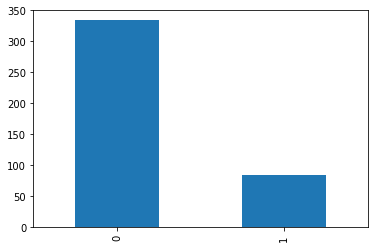

In [46]:
result_func(model,1)

In [36]:
history=model.fit(x,y,epochs=250,batch_size=10,verbose=1)

Epoch 1/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8070
Epoch 2/250
90/90 [==============================] - 0s 5ms/step - loss: 0.4213 - accuracy: 0.8126
Epoch 3/250
90/90 [==============================] - 0s 4ms/step - loss: 0.4297 - accuracy: 0.8081
Epoch 4/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8013
Epoch 5/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8058
Epoch 6/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8103
Epoch 7/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8058
Epoch 8/250
90/90 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8047
Epoch 9/250
90/90 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.8058
Epoch 10/250
90/90 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8047
Epoch 11/

In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


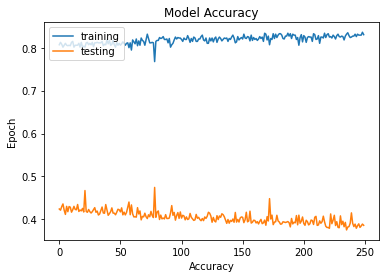

In [38]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training","testing"],loc="upper left")

## 2.Model

In [39]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [41]:
model.fit(x,y,validation_split=0.2,epochs=250,batch_size=10,verbose=2)

Epoch 1/250
72/72 - 1s - loss: 23.0671 - accuracy: 0.4171 - val_loss: 1.5448 - val_accuracy: 0.6425 - 1s/epoch - 15ms/step
Epoch 2/250
72/72 - 0s - loss: 1.1129 - accuracy: 0.5014 - val_loss: 1.4381 - val_accuracy: 0.3296 - 156ms/epoch - 2ms/step
Epoch 3/250
72/72 - 0s - loss: 0.8038 - accuracy: 0.5716 - val_loss: 0.8878 - val_accuracy: 0.3408 - 172ms/epoch - 2ms/step
Epoch 4/250
72/72 - 0s - loss: 0.7357 - accuracy: 0.6138 - val_loss: 0.6599 - val_accuracy: 0.6648 - 230ms/epoch - 3ms/step
Epoch 5/250
72/72 - 0s - loss: 0.7208 - accuracy: 0.5997 - val_loss: 0.7928 - val_accuracy: 0.3631 - 160ms/epoch - 2ms/step
Epoch 6/250
72/72 - 0s - loss: 0.6805 - accuracy: 0.6475 - val_loss: 0.8798 - val_accuracy: 0.3743 - 152ms/epoch - 2ms/step
Epoch 7/250
72/72 - 0s - loss: 0.7325 - accuracy: 0.6166 - val_loss: 0.9268 - val_accuracy: 0.3687 - 151ms/epoch - 2ms/step
Epoch 8/250
72/72 - 0s - loss: 0.6396 - accuracy: 0.6573 - val_loss: 0.5484 - val_accuracy: 0.7151 - 151ms/epoch - 2ms/step
Epoch 9/2

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                196       
                                                                 
 dense_5 (Dense)             (None, 9)                 135       
                                                                 
 dense_6 (Dense)             (None, 4)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [43]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8103


In [44]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 81.03%


14/14 [==============================] - 0s 2ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.041879,0
892,893,0.204845,0
893,894,0.034885,0
894,895,0.043033,0
895,896,0.287680,0
...,...,...,...
1304,1305,0.015189,0
1305,1306,0.999391,1
1306,1307,0.011975,0
1307,1308,0.015084,0


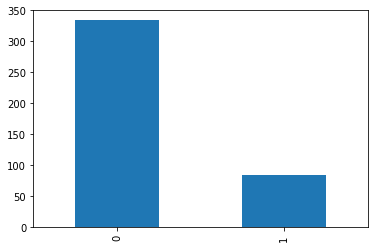

In [45]:
result_func(model,2)

In [47]:
history=model.fit(x,y,validation_split=0.2,epochs=250,batch_size=10,verbose=2)

Epoch 1/250
72/72 - 1s - loss: 0.4113 - accuracy: 0.8160 - val_loss: 0.7459 - val_accuracy: 0.7486 - 512ms/epoch - 7ms/step
Epoch 2/250
72/72 - 0s - loss: 0.4255 - accuracy: 0.8090 - val_loss: 0.3878 - val_accuracy: 0.8156 - 398ms/epoch - 6ms/step
Epoch 3/250
72/72 - 0s - loss: 0.4132 - accuracy: 0.8287 - val_loss: 0.4246 - val_accuracy: 0.7765 - 410ms/epoch - 6ms/step
Epoch 4/250
72/72 - 0s - loss: 0.4303 - accuracy: 0.8090 - val_loss: 0.4703 - val_accuracy: 0.7709 - 314ms/epoch - 4ms/step
Epoch 5/250
72/72 - 0s - loss: 0.4115 - accuracy: 0.8090 - val_loss: 0.4316 - val_accuracy: 0.7765 - 387ms/epoch - 5ms/step
Epoch 6/250
72/72 - 0s - loss: 0.4178 - accuracy: 0.8132 - val_loss: 0.3895 - val_accuracy: 0.8101 - 358ms/epoch - 5ms/step
Epoch 7/250
72/72 - 0s - loss: 0.4215 - accuracy: 0.8202 - val_loss: 0.3964 - val_accuracy: 0.8156 - 307ms/epoch - 4ms/step
Epoch 8/250
72/72 - 0s - loss: 0.4130 - accuracy: 0.8104 - val_loss: 0.4063 - val_accuracy: 0.7989 - 205ms/epoch - 3ms/step
Epoch 9/

<function matplotlib.pyplot.show(*args, **kw)>

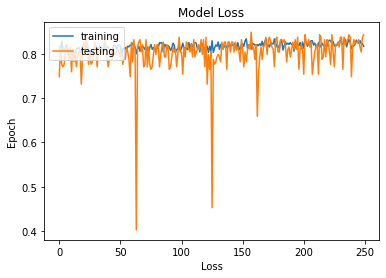

In [50]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training","testing"],loc="upper left")

plt.show